In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
plt.style.use("ggplot")

In [2]:
dataset = pd.read_csv('C:/Users/risha\Desktop/Wholesale customers data.csv')
dataset.shape
dataset.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
dataset['Channel'] = dataset['Channel'].astype('category')
dataset['Region'] = dataset['Region'].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Channel           440 non-null    category
 1   Region            440 non-null    category
 2   Fresh             440 non-null    int64   
 3   Milk              440 non-null    int64   
 4   Grocery           440 non-null    int64   
 5   Frozen            440 non-null    int64   
 6   Detergents_Paper  440 non-null    int64   
 7   Delicassen        440 non-null    int64   
dtypes: category(2), int64(6)
memory usage: 21.9 KB


In [5]:
x=dataset
num_cols = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
cat_cols =['Channel','Region']
dummies = pd.get_dummies(x[cat_cols])
dummies.head(5)

,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0,1,0,0,1
1,0,1,0,0,1
2,0,1,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [6]:
# combining dummies variables and numerical variables
X1 =x[num_cols]
X2 = pd.concat([dummies , X1], axis=1)
X=X2

Y = dataset['Frozen']

In [7]:
#splitting into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state =0)
X_train.head(5)
X_test0 = X_test
Y_test0 = Y_test

In [8]:
#PCA to check variance
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("varinace found by PCA")
list(explained_variance)

varinace found by PCA


[0.5620638011192843,
 0.28583496315588597,
 0.11271019385101923,
 0.03130184922485544,
 0.004847882048667635,
 0.00324130857130397,
 9.833277841571817e-10,
 6.668180440060054e-10,
 3.788374845108909e-10,
 2.2838667745007647e-34,
 1.4425590039567893e-35]

In [9]:
#selecting two columns for vairance 
from sklearn.decomposition import PCA
i=2
pca = PCA(n_components = i)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("varinace found by PCA")
list(explained_variance)

varinace found by PCA


[0.5620638011192843, 0.28583496315588597]

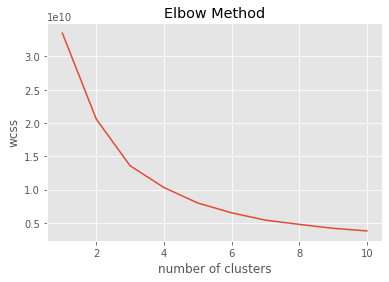

In [10]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init ='k-means++', random_state=42)
    kmeans.fit(X_test)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()


In [11]:
X3 = X_test

In [12]:
#vizualizing the cluster
plt.scatter(X3[y_kmeans==0,0],X3[y_kmeans==0,1], s=100,c='red',label='segment 1')
plt.scatter(X3[y_kmeans==1,0],X3[y_kmeans==1,1], s=100,c='blue',label='segment 2')
plt.scatter(X3[y_kmeans==2,0],X3[y_kmeans==2,1], s=100,c='green',label='segment 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200,c='yellow',label='Centroid')
plt.title("customer segments")
plt.legend()
plt.show()

NameError: name 'y_kmeans' is not defined